In [13]:
#Import the tensorflow librabry and Load the MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [14]:
#Scale the data
x_train=xtrain/255.
x_test=xtest/255.

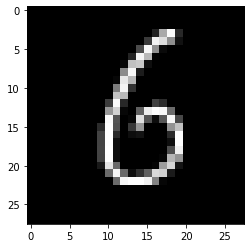

In [31]:
#Visualize few samples
import matplotlib.pyplot as plt
plt.imshow(x_train[18,:,:],cmap='gray')

In [15]:
xtrain.shape

(60000, 28, 28)

In [16]:
# CNN required data to be in the 4D
# first dimension is number of images
# second dimension is number of rows in the image
# Third dimension is number of columns in the image
# Fourth dimension is number of planes in the image( 1 for grayscale, 3 for color)
import numpy as np
xtrain1=np.expand_dims(x_train,3) 
xtest1=np.expand_dims(x_test,3)

In [17]:
xtrain1.shape

(60000, 28, 28, 1)

In [18]:
#Encode the target column
ytrain=tf.keras.utils.to_categorical(ytrain,num_classes=10)
ytest=tf.keras.utils.to_categorical(ytest,num_classes=10)

In [19]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
# import the libraries required for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [21]:
#Define the architecture of CNN
classifier=Sequential()

classifier.add(Conv2D(16,(3,3),input_shape=(28,28,1),activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=10,activation='softmax'))


In [22]:
# compilation statergy for the model
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
# apply earlystopping callback to stop the iteration if there is no improvement in model performace 
                               #for few consecutive iteration defined by 'patience'
# apply model checkpoint callback to save the weights corresponds to the best iteration
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callback=[EarlyStopping(monitor='val_loss',patience=3,mode='min',min_delta=0.001),
               ModelCheckpoint('./Check_Point',monitor='val_loss',save_best_only=True)]

In [26]:
# fit (Train) the model with callbacks
classifier.fit(x=xtrain1,y=ytrain,batch_size=32,epochs=10,validation_split=0.2,callbacks=keras_callback)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47840/48000 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9969WARNING:tensorflow:From C:\Users\Senthil\Anaconda3\envs\dl_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Check_Point\assets
48000/48000 [==============================] - 23s 475us/sample - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0502 - val_accuracy: 0.9887
Epoch 2/10
48000/48000 [==============================] - 27s 560us/sample - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0531 - val_accuracy: 0.9879
Epoch 3/10
48000/48000 [==============================] - 21s 446us/sample - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0

In [28]:
# Save the weights, this weight we are going to use in out next experiment on Transfer Learning
classifier.save('my_digit_model.h5')